### 感知机算法

#### 1.感知机模型
感知机模型的假设空间是定义在特征空间中的所有线性分类器模型，即函数集合${f|f(x)=w\cdot x+b}$
$$f(x)=sign(wx+b)$$

$$sign(x)=
\begin{cases}
    +1, & \text{if } x \geq 0 \\
    -1, & \text{if } x < 0
\end{cases}
$$

#### 2.感知机学习策略
确定模型的准则：损失函数与风险函数
<br>所有误分类点集$M$到超平面$S$的总距离(**连续可导**)
$$-\frac{1}{||\mathbf{w}||}\sum_{x_i\in M}y_i(\omega \cdot x_i +b)$$
#### 3.感知机算法
使用什么样子的计算方法求解最优模型---最优化问题
$$min_{w,b} L(\omega,b)=-\sum_{x_i\in M}y_i(\omega \cdot x_i+b)$$
随机梯度下降法stochastic gradient descent:首先任意选取一个超平面$w_0,b_0$,然后用梯度下降法不断极小化目标函数,极小化过程中不是一次使$M$中所有误分类点的梯度下降，而是一次随机选取一个误分类点使其梯度下降

损失函数的梯度
$$\nabla_{\omega}L(\omega,b)=-\sum_{x_i\in M}y_ix_i$$
$$\nabla_{b}L(\omega,b)=-\sum_{x_i\in M}y_i$$

更新：
$$\omega_{t+1}=\omega_t+\eta y_ix_i$$
$$b_{t+1}=b_t+\eta y_i$$
- **适用问题类型**：二分类的线性分类模型、判别模型
- **原理**：将输入空间划分为两个部分，在两个部分之间找到一个最优的超平面来进行分类；如果样本点是可以完美分割的，那么感知机算法会找到一个唯一的超平面来进行分类；如果样本点不能完美分割，那么感知机算法会在有限次迭代之后停止，返回一个近似的超平面
- **感知机算法步骤**：
    1. 初始化权重向量w和偏置
    2. 从训练数据集中去取出一个样本x,计算它的预测值
    3. 如果$\hat{y}$等于样本标签$y$，则不需要更新权重向量和偏置
    4. 如果$\hat{y}$不等于标签$y$,则需要按照下面的公式更新权重向量和偏置: $w = w + \alpha y (X +b)$
    5. 对所有样本都重复执行步骤2到4,直到所有的样本都被正确分类或者达到了迭代次数的上限

In [1]:
import numpy as np

In [42]:
class MyPerceptron(object):
    """感知机分类器
    
    参数 params
    ---------
    learning_rate : float
        学习率 : learning rate(0-1)
    max_iter : int
        训练集循环的次数
    """
    def __init__(self, learning_rate =0.1, max_iter=10):
        self.learning_rate = learning_rate #学习率
        self.max_iter = max_iter #最大迭代次数
        self.w = None #权重
        self.b = 0 #偏置
    
    def fit(self,X,y):
        """
        训练集的拟合方法
        
        参数
        --------
        X: {array-like},shape = {n_samples, n_features}
            特征集，训练向量
        y: {array-like}, shape = {n_samples}
            目标值，标签
            
        返回参数 return 
        ---------
        self : object
        
        """
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)#初始化权重向量为0向量
        self.b = 0 #初始化偏置
        
        for _ in range(self.max_iter):
            flag = True #标记位，如果所有样本都正确分类，则退出循环
            for i in range(n_samples):
                x = X[i]
                y_hat = np.dot(self.w, x) + self.b #计算预测值
                if y_hat*y[i]<=0:
                    self.w += self.learning_rate*y[i]*x
                    self.b += self.learning_rate*y[i]
                    flag = False
            if flag: #如果所有样本都被分类正确，则退出循环
                break
    
    def predict(self,X):
        """
        返回分类标签
        """
        y_hat = np.dot(X,self.w)+self.b
        return np.sign(y_hat)

In [54]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
d = np.array([1,1,1,-1])
perceptron = MyPerceptron()
perceptron.fit(X,d)
print(perceptron.w)
print(perceptron.b)
print(perceptron.predict(np.array([[0,0],[2,2]])))

[-0.2 -0.1]
0.20000000000000004
[ 1. -1.]


#### 4.调用sklearn中感知机模型

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

In [5]:
#导入数据集
iris = load_iris()

In [24]:
#数据集中有3个类，每类各有50个,我们取0，1两类,数据集有4个特征，我们选取第二、三个特征方便分析
data = iris.data[:,2:4][iris.target<2]
target = iris.target[iris.target<2]

In [67]:
#将数据切分为训练集和测试集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.33,random_state=42)

(-2.0, 6.0)

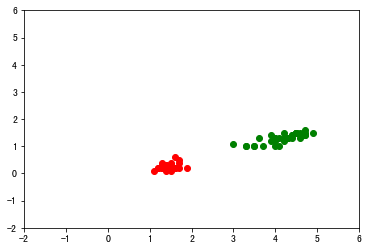

In [27]:
#数据分布
plt.scatter(X_train[y_train==0][:,0],X_train[y_train==0][:,1],c='r')
plt.scatter(X_train[y_train==1][:,0],X_train[y_train==1][:,1],c='g')
plt.xlim(-2,6)
plt.ylim(-2,6)

In [30]:
#导入感知机模型开始训练
from sklearn.linear_model import Perceptron
clf = Perceptron()
clf.fit(X_train, y_train)
X_predict = clf.predict(X_test)
X_predict

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1])

In [35]:
sum(X_predict==y_test)/(X_predict.shape[0])#准确度

1.0

In [38]:
#查看求得的超平面
print('直线法向量',clf.coef_,'截距',clf.intercept_)

直线法向量 [[0.8 0.8]] 截距 [-2.]


直线方程为$0.8x_1+0.8x_2-2=0$化简为$x_1+x_2-2.5=0$

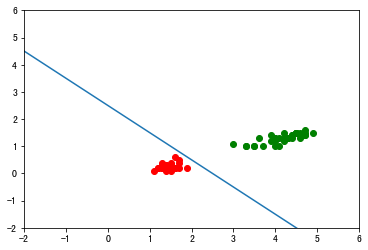

In [39]:
#分割图
#数据分布
plt.scatter(X_train[y_train==0][:,0],X_train[y_train==0][:,1],c='r')
plt.scatter(X_train[y_train==1][:,0],X_train[y_train==1][:,1],c='g')
plt.xlim(-2,6)
plt.ylim(-2,6)
x_1 = np.ac(-2,6,0.01)
x_2 = 2.5-x_1
plt.plot(x_1,x_2)

#### 5.调用自编代码实现二分类

In [68]:
#调用自定义的感知机代码查看在iris数据集上的效果
clf2 = MyPerceptron(learning_rate=0.1,max_iter=100)
y_train_con = np.where(y_train==0,-1,1)
clf2.fit(X_train,y_train_con)
X_predict = clf2.predict(X_test)
sum(X_predict == np.where(y_test==0,-1,1))/(X_predict.shape[0])

array([ 1.,  1.,  1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.,  1.,
       -1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1., -1., -1.,  1., -1.,
       -1.,  1., -1.,  1., -1., -1.,  1.])

In [70]:
print('直线法向量',clf2.w,'截距',clf2.b)

直线法向量 [0.02 0.04] 截距 -0.1


直线为$0.02X_1+0.04X_2-0.1=0$化简可得$x_1+2x_2-5=0$

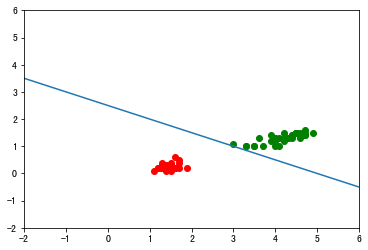

In [71]:
#分割图
plt.scatter(X_train[y_train==0][:,0],X_train[y_train==0][:,1],c='r')
plt.scatter(X_train[y_train==1][:,0],X_train[y_train==1][:,1],c='g')
plt.xlim(-2,6)
plt.ylim(-2,6)
x_1 = np.arange(-2,6,0.01)
x_2 = 2.5-1/2*x_1
plt.plot(x_1,x_2)